In [1]:
import pandas as pd
df = pd.read_csv('c:/data/school/data.csv')
df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[0:8]
print(train_cols)
X = df[train_cols]
y = df['Label']
y.value_counts()

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')


0    2158
1     445
Name: Label, dtype: int64

c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

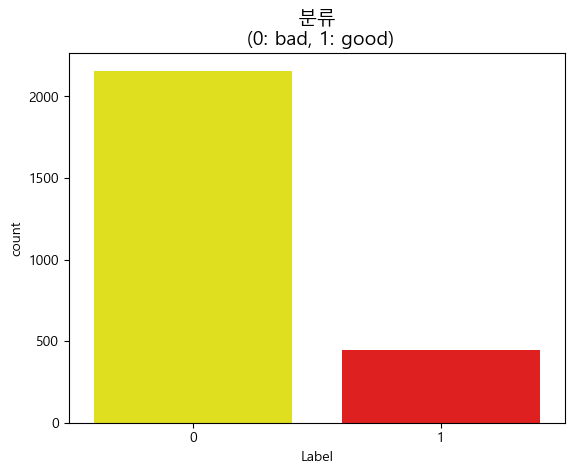

In [3]:
#데이터 불균형 확인
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

colors = ['yellow', 'red']
sns.countplot('Label', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Label'].value_counts()

0    445
1    445
Name: Label, dtype: int64

In [5]:
X = X_samp
y = y_samp

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=10)

In [7]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X_train, y_train)
print('학습용:', logit.score(X_train, y_train))
print('검증용:', logit.score(X_test, y_test))

학습용: 0.8862359550561798
검증용: 0.8651685393258427


c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


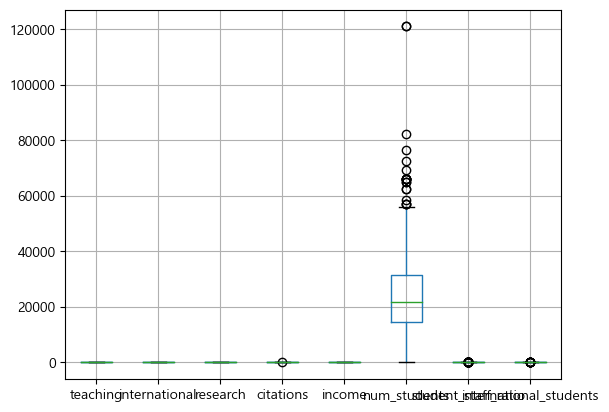

In [8]:
X_train.boxplot()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

c:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


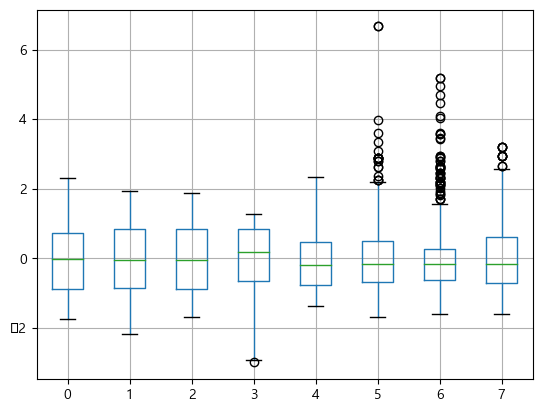

In [10]:
X_train_scaled.boxplot()
plt.show()

In [11]:
#알고리즘별 정확도를 저장할 리스트
result_tr = []
result_te = []

In [12]:
logit = LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)
score_tr = logit.score(X_train_scaled, y_train)
score_te = logit.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9887640449438202
검증용: 0.9943820224719101


c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)
print('학습용:', tree.score(X_train_scaled, y_train))
print('검증용:', tree.score(X_test_scaled, y_test))

학습용: 1.0
검증용: 0.9719101123595506


In [14]:
#가지치기
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)
score_tr = tree.score(X_train_scaled, y_train)
score_te = tree.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9789325842696629
검증용: 0.9775280898876404


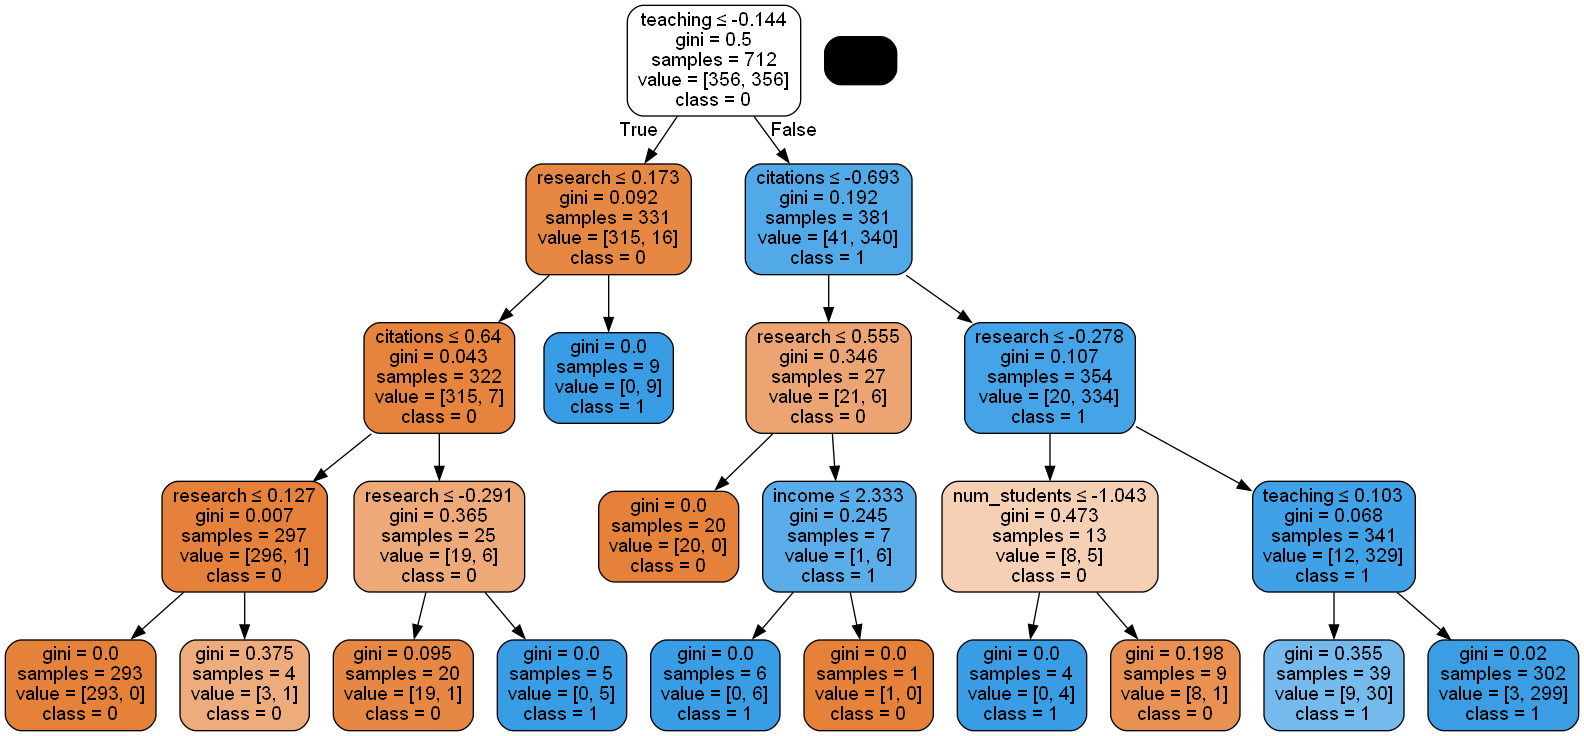

In [15]:
#트리구조 시각화
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols,
                           class_names=["0", "1"], filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

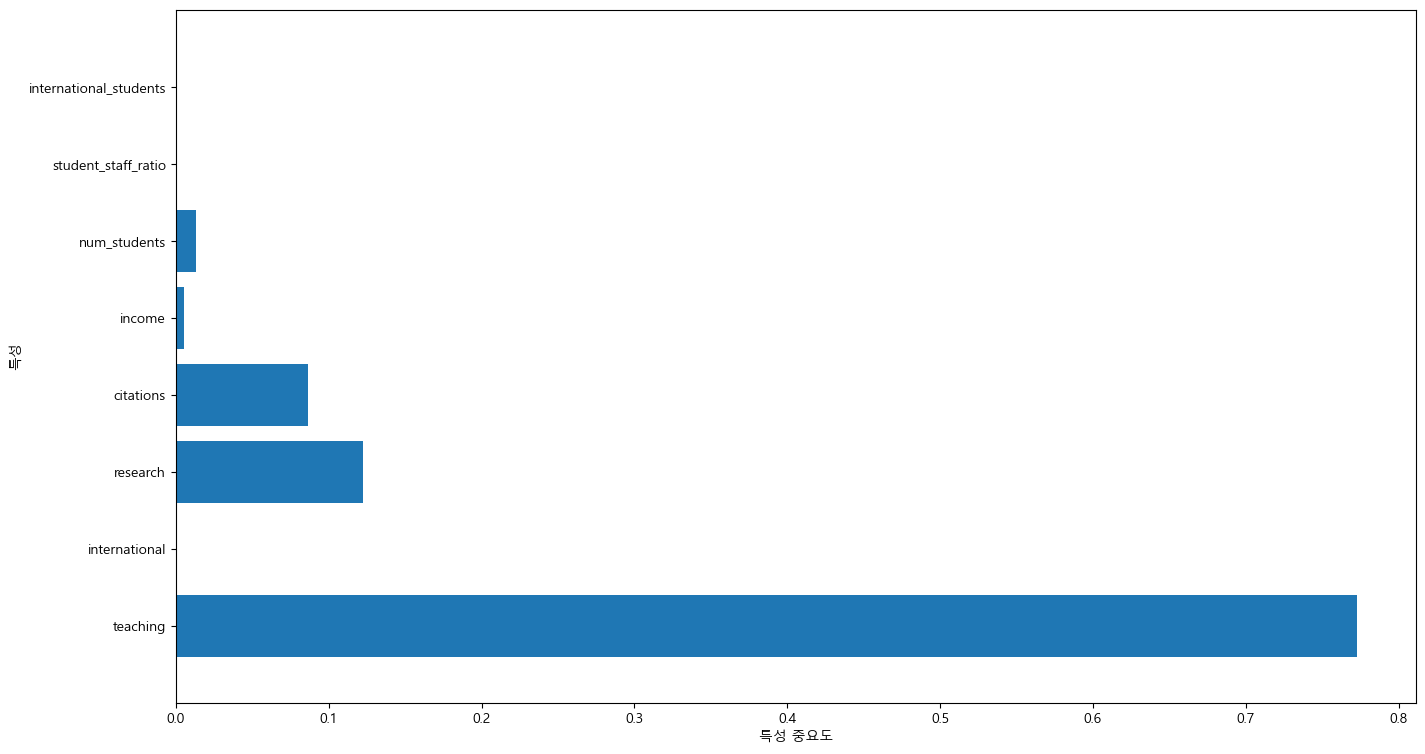

In [16]:
#트리모형의 특성 중요도
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
plot_tree(tree)

In [17]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)
score_tr = forest.score(X_train_scaled, y_train)
score_te = forest.score(X_test_scaled, y_test)
print('학습용:', score_tr)
print('검증용:', score_te)
result_tr.append(score_tr)
result_te.append(score_te)


학습용: 1.0
검증용: 0.9943820224719101


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13004\361906244.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_scaled, y_train)


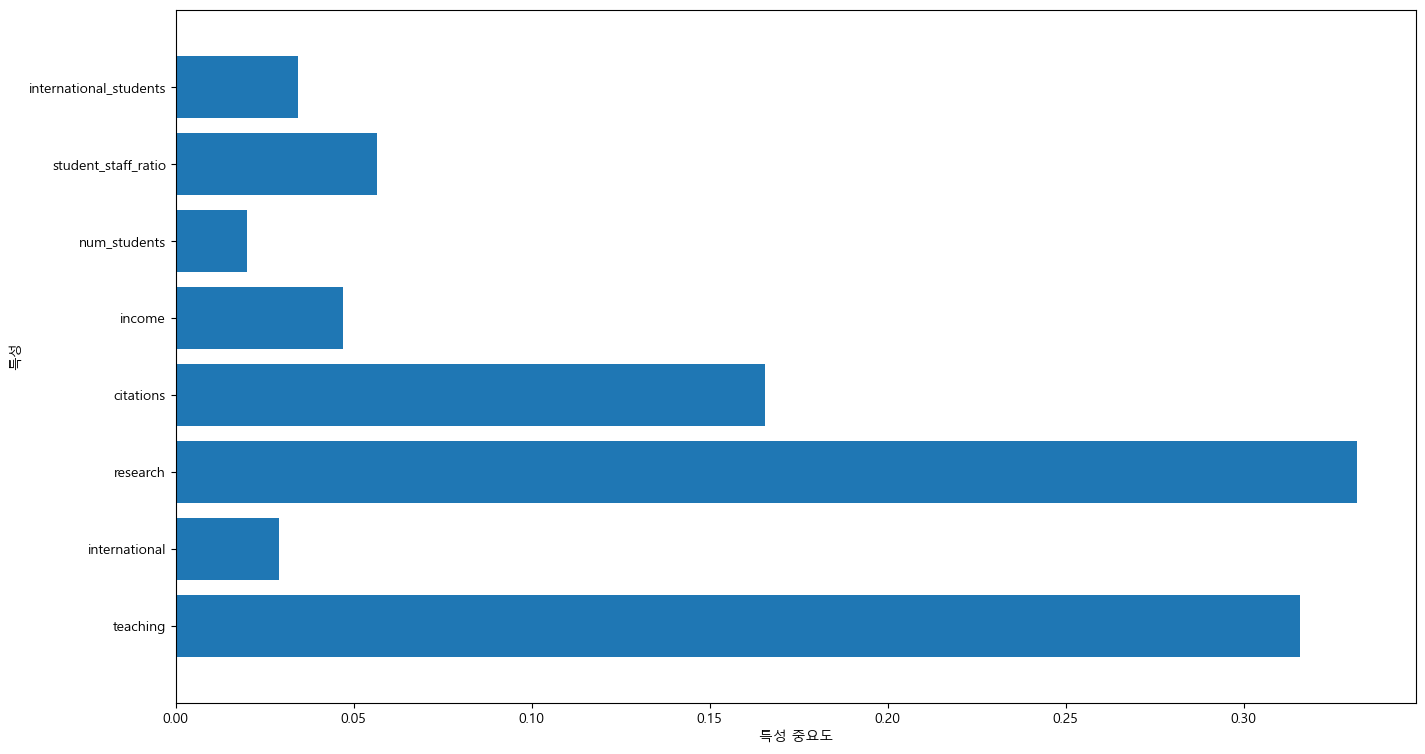

In [18]:
#랜덤포레스트의 특성 중요도
plot_tree(forest)

In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
train_rate = []
test_rate = []
neighbors = range(1, 11)
for n in neighbors:
    # 모델생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train_scaled, y_train))

    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test_scaled, y_test))

# 가장 좋은 정확도
test_arr = np.array(test_rate)
max_rate = np.max(test_arr)

# 가장 성능이 좋은 인덱스
idx = np.where(test_arr == max_rate)[0][0]

print('최적의 k:', neighbors[idx])
print('최고 정확도:', test_rate[idx])

c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts 

최적의 k: 5
최고 정확도: 0.9887640449438202


c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

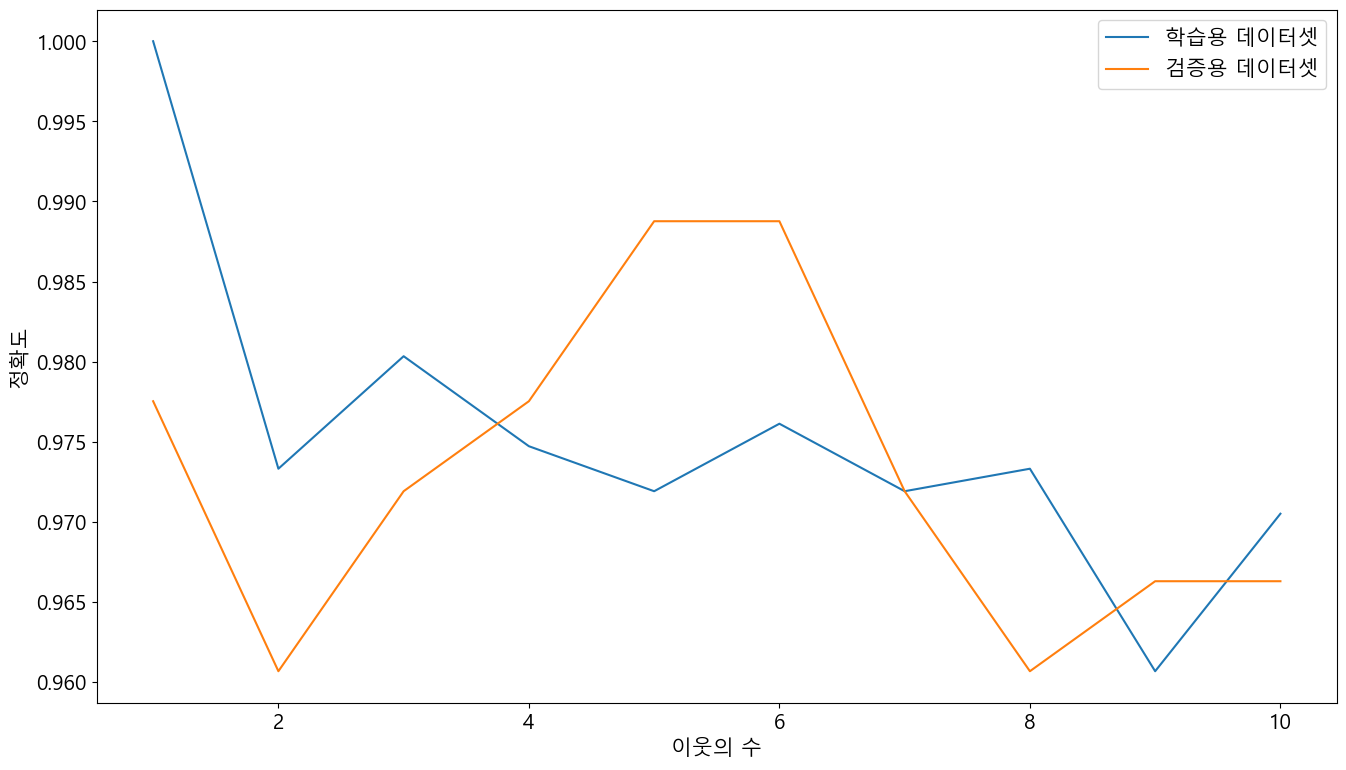

In [20]:
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
score_tr = knn.score(X_train_scaled, y_train)
score_te = knn.score(X_test_scaled, y_test)
print("학습용:", score_tr)
print("검증용:", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9719101123595506
검증용: 0.9887640449438202


c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts 

In [22]:
#인공신경망
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=10)
mlp.fit(X_train_scaled, y_train)
score_tr = mlp.score(X_train_scaled, y_train)
score_te = mlp.score(X_test_scaled, y_test)
print("학습용:", score_tr)
print("검증용:", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

c:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습용: 0.9943820224719101
검증용: 0.9943820224719101


c:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
#SVM
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)
print("학습용:", svm.score(X_train_scaled, y_train))
print("검증용:", svm.score(X_test_scaled, y_test))

학습용: 0.9873595505617978
검증용: 0.9887640449438202


c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
#최적의 C와 gamma를 찾는 과정
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        # 모델생성
        svm = SVC(C=n, gamma=g, random_state=10)
        svm.fit(X_train_scaled, y_train)

        # 학습용 데이터셋의 정확도
        train_rate.append([n, g, svm.score(X_train_scaled, y_train)])

        # 검증용 데이터셋의 정확도
        test_rate.append([n, g, svm.score(X_test_scaled, y_test)])

# 가장 좋은 정확도
test_arr = np.array(test_rate)
max_rate = np.max(test_arr[:, 2])

# 가장 성능이 좋은 인덱스
idx = np.argmax(test_arr[:, 2])

print('최적의 C:', test_rate[idx][0])
print('최적의 gamma:', test_rate[idx][1])
print('최고 정확도:', test_rate[idx][2])

c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

최적의 C: 100
최적의 gamma: 0.01
최고 정확도: 1.0


c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


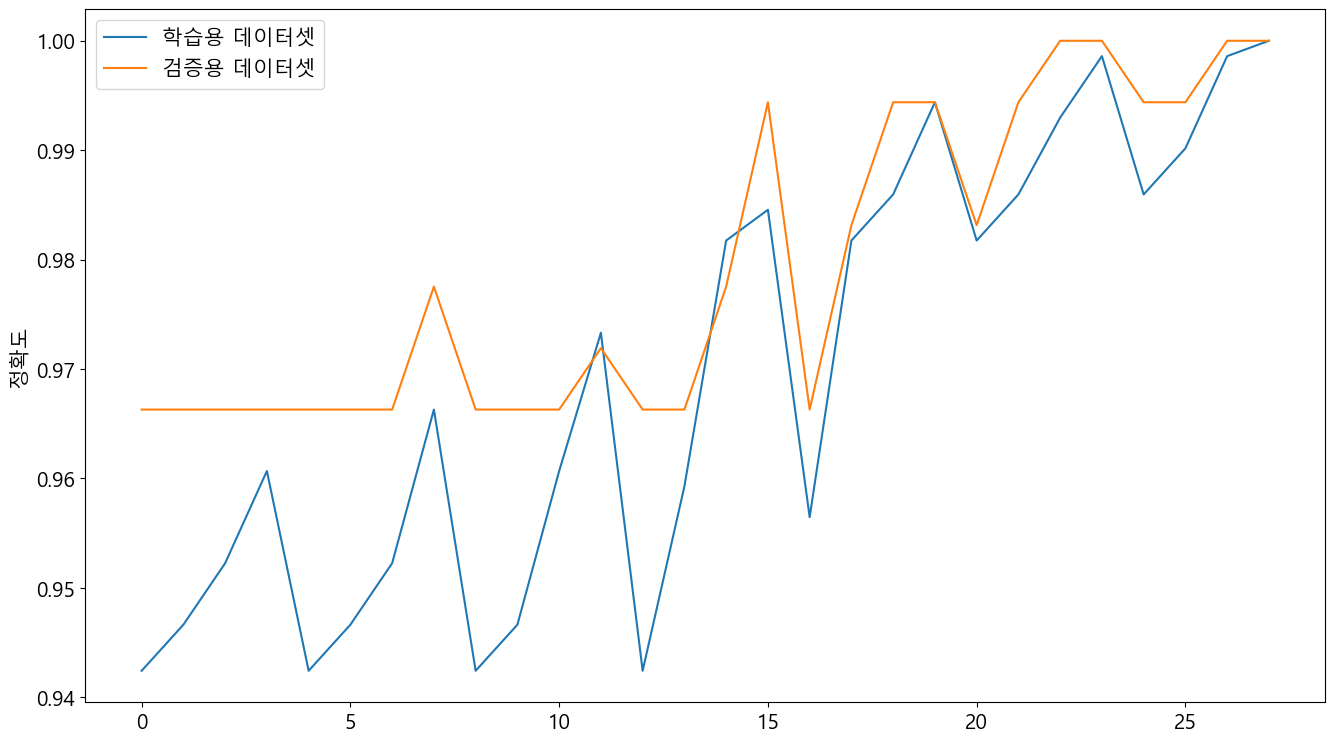

In [25]:
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), np.array(train_rate)[:, 2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:, 2], label="검증용 데이터셋")
plt.ylabel("정확도")
plt.legend()
plt.show()

In [26]:
svm = SVC(C=100, gamma=0.01, random_state=10)
svm.fit(X_train_scaled, y_train)
score_tr = svm.score(X_train_scaled, y_train)
score_te = svm.score(X_test_scaled, y_test)
print("학습용:", score_tr)
print("검증용:", score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9929775280898876
검증용: 1.0


c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
#DNN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.01)
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1], ), activation='relu', name='hidden-1'))
model.add(Dense(64, activation='relu', name='hidden-2'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [28]:
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.6461 - accuracy: 0.6081
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.8329
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.9017
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.9143
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.9368
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.9396
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.9424
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.9494
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9551
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9607
Epoch 11/

In [29]:
loss, acc_tr = model.evaluate(X_train_scaled, y_train, verbose=0)
loss, acc_te = model.evaluate(X_test_scaled, y_test, verbose=0)
print(acc_tr)
print(acc_te)

0.9915730357170105
1.0


In [30]:
sgd = SGD(learning_rate=0.01)
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1], ), activation='relu', name='hidden-1'))
model.add(Dense(64, activation='relu', name='hidden-2'))
model.add(Dense(1, activation='sigmoid', name='output'))
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
es = EarlyStopping(monitor='val_loss', patience=5)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("school_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) # 기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=500, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/500
18/18 [==============================] - 1s 14ms/step - loss: 0.7080 - accuracy: 0.4921 - val_loss: 0.6684 - val_accuracy: 0.5804 - lr: 0.0100
Epoch 2/500
18/18 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.6643 - val_loss: 0.6154 - val_accuracy: 0.7902 - lr: 0.0100
Epoch 3/500
18/18 [==============================] - 0s 6ms/step - loss: 0.6059 - accuracy: 0.7838 - val_loss: 0.5707 - val_accuracy: 0.8741 - lr: 0.0100
Epoch 4/500
18/18 [==============================] - 0s 7ms/step - loss: 0.5660 - accuracy: 0.8436 - val_loss: 0.5316 - val_accuracy: 0.8951 - lr: 0.0100
Epoch 5/500
18/18 [==============================] - 0s 7ms/step - loss: 0.5301 - accuracy: 0.8822 - val_loss: 0.4959 - val_accuracy: 0.9021 - lr: 0.0100
Epoch 6/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.8963 - val_loss: 0.4628 - val_accuracy: 0.9021 - lr: 0.0100
Epoch 7/500
18/18 [==============================] - 0s 7ms/step - loss: 0.

In [33]:
from keras.models import load_model
model=load_model('school_best.h5')  
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.01609264686703682, 0.9943820238113403]

In [32]:
loss, acc_tr = model.evaluate(X_train_scaled, y_train, verbose=0)
loss, acc_te = model.evaluate(X_test_scaled, y_test, verbose=0)
print(acc_tr)
print(acc_te)
result_tr.append(acc_tr)
result_te.append(acc_te)

0.9971910119056702
0.9943820238113403


In [34]:
#알고리즘별 예측도 그래프
methods = ['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']

# 훈련용 데이터셋의 정확도
result_tr_arr = np.array(result_tr)

# 가장 좋은 정확도
max_rate_tr = np.max(result_tr_arr)

# 가장 성능이 좋은 인덱스
idx_tr = np.argmax(result_tr_arr)

# 검증용 데이터셋의 정확도
result_te_arr = np.array(result_te)

# 가장 좋은 정확도
max_rate_te = np.max(result_te_arr)

# 가장 성능이 좋은 인덱스
idx_te = np.argmax(result_te_arr)

print(methods)
print(result_tr)
print(result_te)
print('최적의 모형(학습용):', methods[idx_tr])
print('최고 정확도(학습용):', max_rate_tr)
print('최적의 모형(검증용):', methods[idx_te])
print('최고 정확도(검증용):', max_rate_te)

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.9887640449438202, 0.9789325842696629, 1.0, 0.9719101123595506, 0.9943820224719101, 0.9929775280898876, 0.9971910119056702]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9887640449438202, 0.9943820224719101, 1.0, 0.9943820238113403]
최적의 모형(학습용): RF
최고 정확도(학습용): 1.0
최적의 모형(검증용): SVM
최고 정확도(검증용): 1.0


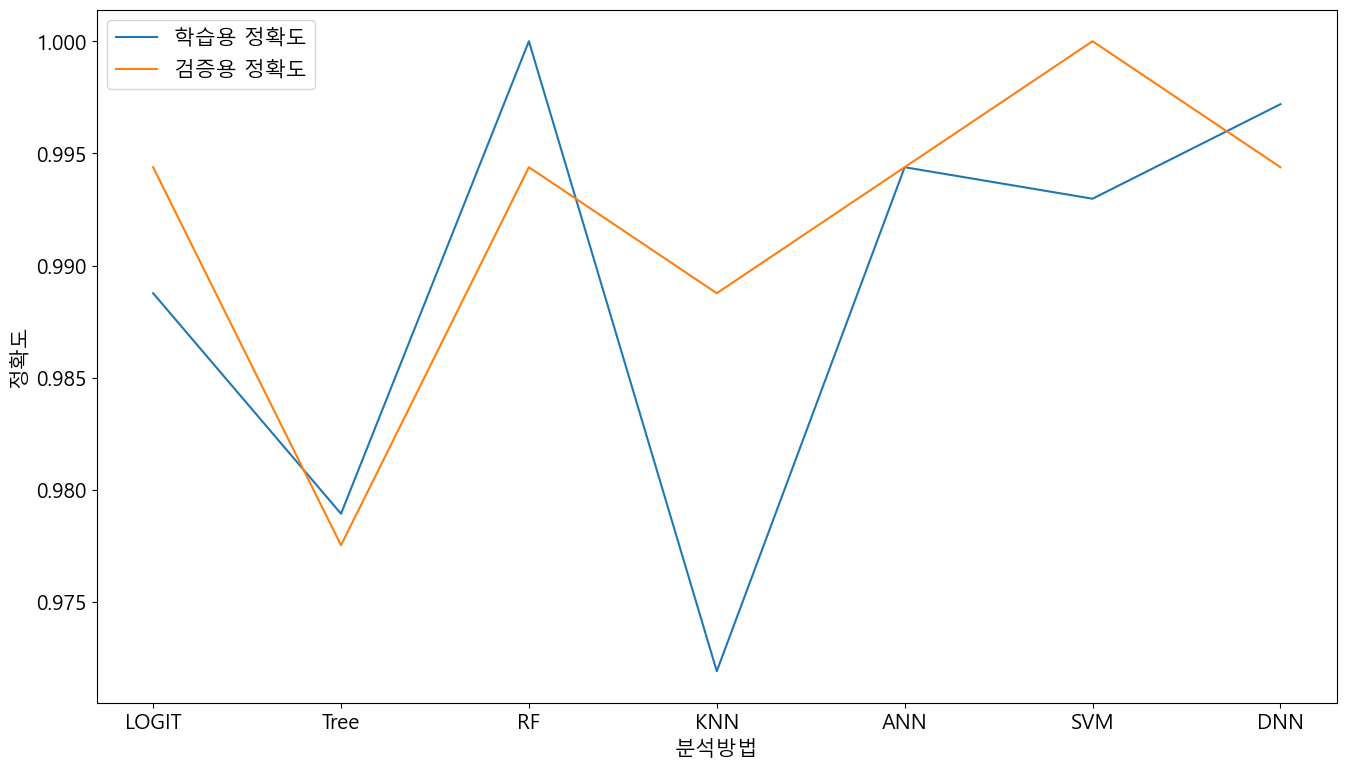

In [35]:
plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도")
plt.xlabel('분석방법')
plt.ylabel("정확도")
plt.legend()
plt.show()